# Replication of R results in Python

ggplot in Python works much the same as ggplot2 in R.  
So if you can do it in Python, you also can do it in R, and vice versa.  

To show this we will reproduce the R results with Python, so you can judge for yourself.  

Not only is the ggplot code the same. As you will see the SQL-code is even more equal.

# 0 -  setup Python

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# if not installed, install pandasql (uncomment line below)
#!pip install pandasql
from pandasql import sqldf
from plotnine import *

# 1 - get the data

In [2]:
dat = pd.read_csv('./dat/analytic_data.csv')

In [3]:
dat.head()

,decade,event,fatal,injur,damage
0,199,TORNADO,0,28,1917
1,199,TORNADO,0,0,19
2,199,TORNADO,0,0,19
3,199,TORNADO,0,3,1917
4,199,TORNADO,0,2,1917


In [4]:
# have a look at the data that will be plotted by ggplot
sqldf("""
SELECT event, decade, SUM(injur) AS injuries
FROM dat
GROUP BY event, decade
ORDER BY event, decade
""")

,event,decade,injuries
0,COLD,199,4842
1,COLD,200,1423
2,FLOOD,199,7524
3,FLOOD,200,801
4,HEAT,199,4703
5,HEAT,200,5142
6,LIGHTNING,199,2238
7,LIGHTNING,200,2617
8,MISC,199,900
9,MISC,200,910


# 2 - compare R with Python 

## The R example to reproduce

Here is the R code and result we want to reproduce in Python

![r-code](./art/Rcode_sql_ggplot.jpg)

## Reproduction of the R example using Python

For [R-code and R-graph](http://rpubs.com/vilkoos/52188) click on link

In [5]:
injur = sqldf(""" 
   SELECT event, decade, SUM(injur) AS injuries
   FROM dat
   GROUP BY event, decade
   ORDER BY event, decade
""")

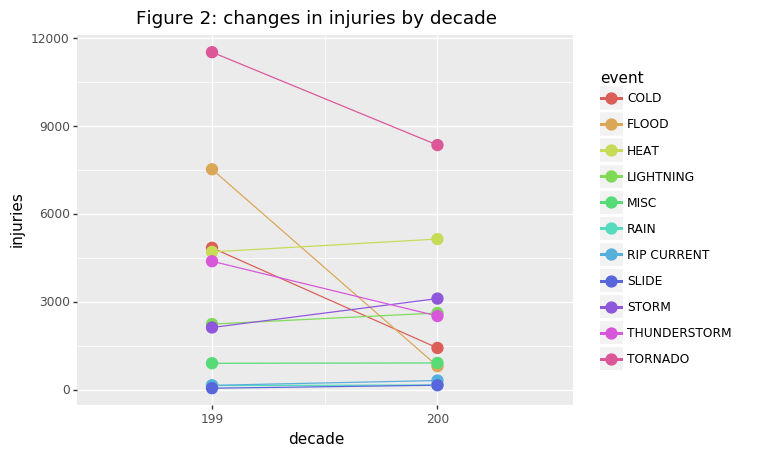

<ggplot: (-9223372036831513077)>

In [6]:
ggplot(injur, aes(x='decade', y='injuries', colour='event', group='event')) + \
              geom_line() + \
              geom_point(size=4) + \
              ggtitle("Figure 2: changes in injuries by decade") + \
              scale_x_continuous(breaks=[199,200], limits=[198.5, 200.5])

As you can see the sql is almost identical.  
The ggplot codings are the same except some details ('' around column names and the \ at the end of a line).  
The produced plots are simular (but not identical).  

## reference

[pandasql](http://blog.yhat.com/posts/pandasql-intro.html): Make python speak SQL